In [ ]:
from google.colab import files; files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xolila","key":"d2ecd17b261c8613b4bd7f83dcffe93f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d camnugent/california-housing-prices -p /content/california-housing-prices --unzip

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 678MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/california-housing-prices/housing.csv",encoding="latin1")

FileNotFoundError: [Errno 2] No such file or directory: '/content/california-housing-prices/housing.csv'

In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
train_data = X_test.join(y_test)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2213,-119.84,36.85,8.0,3791.0,487.0,1424.0,475.0,10.5144,INLAND,345900.0
13417,-117.47,34.06,33.0,1379.0,273.0,884.0,229.0,2.7574,INLAND,125000.0
29,-122.28,37.84,52.0,729.0,160.0,395.0,155.0,1.6875,NEAR BAY,132000.0
11480,-118.03,33.72,24.0,5203.0,957.0,2465.0,946.0,5.1630,<1H OCEAN,261000.0
18763,-122.32,40.71,18.0,2879.0,578.0,1399.0,586.0,2.4036,INLAND,105400.0
...,...,...,...,...,...,...,...,...,...,...
13042,-121.13,38.55,8.0,530.0,109.0,398.0,96.0,4.2031,INLAND,212500.0
14289,-117.13,32.74,46.0,3355.0,768.0,1457.0,708.0,2.6604,NEAR OCEAN,170100.0
2260,-119.84,36.78,24.0,3242.0,795.0,2764.0,773.0,1.3385,INLAND,58800.0
14277,-117.13,32.70,35.0,1179.0,344.0,1372.0,330.0,1.9509,NEAR OCEAN,70200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

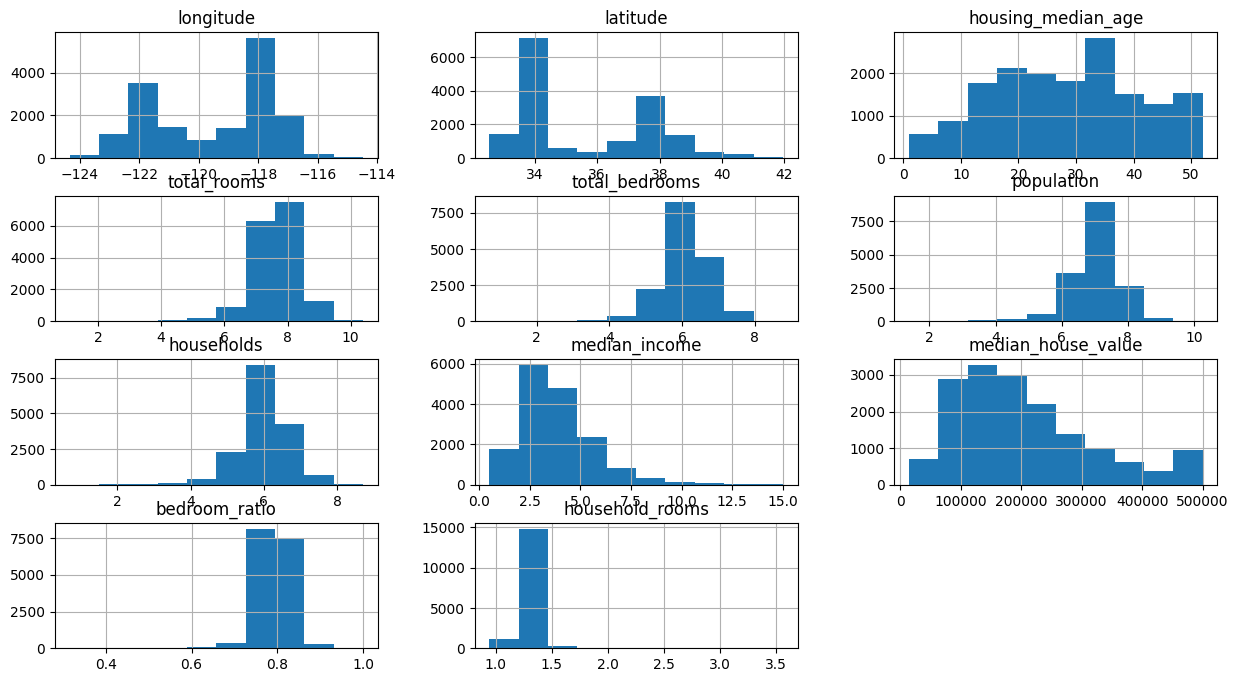

In [ ]:
train_data.hist(figsize=(15 , 8))

<Axes: >

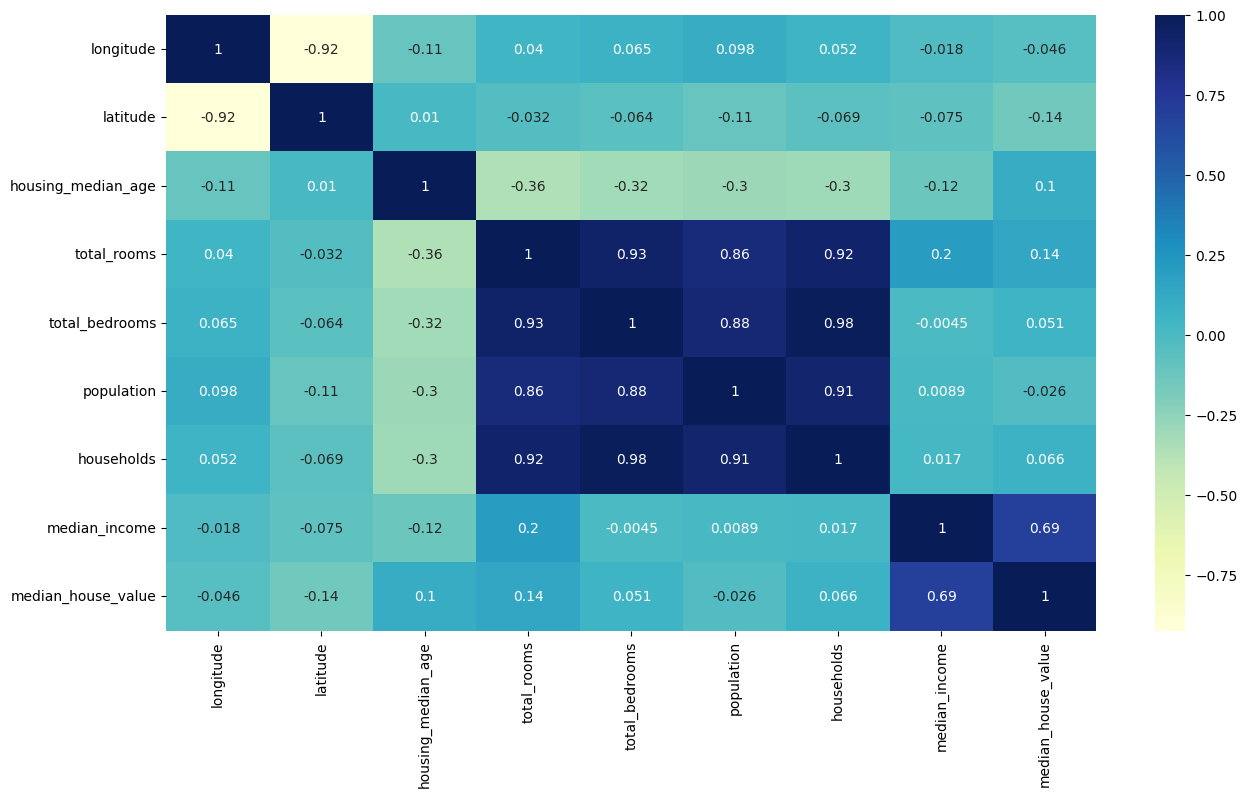

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

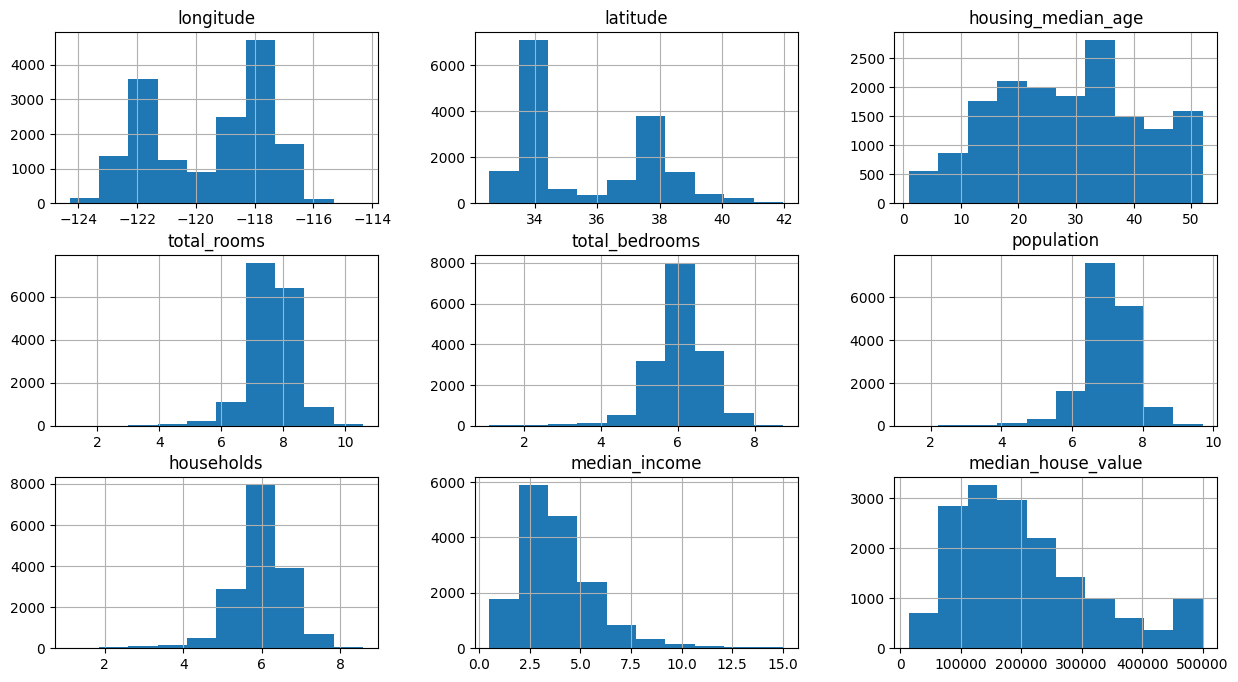

In [ ]:
train_data.hist(figsize=(15 , 8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"] , axis=1)

<Axes: >

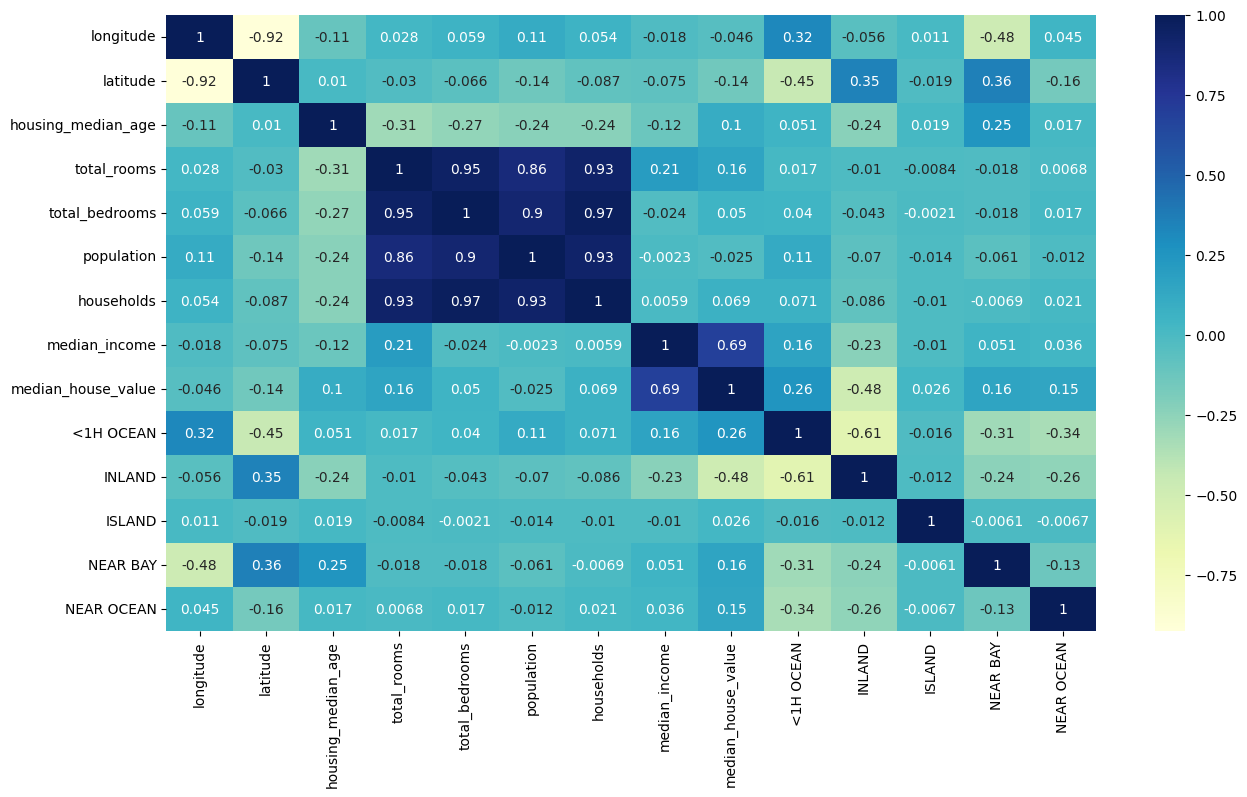

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

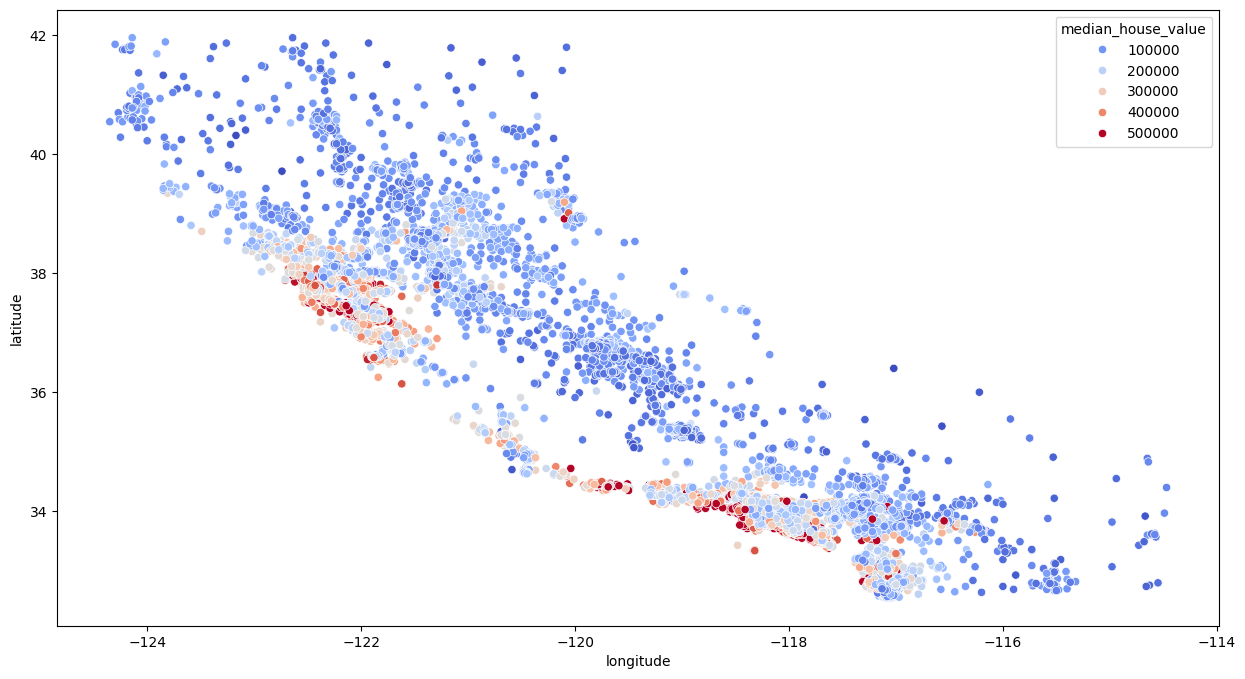

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude" , y="latitude" , data=train_data , hue="median_house_value" , palette="coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

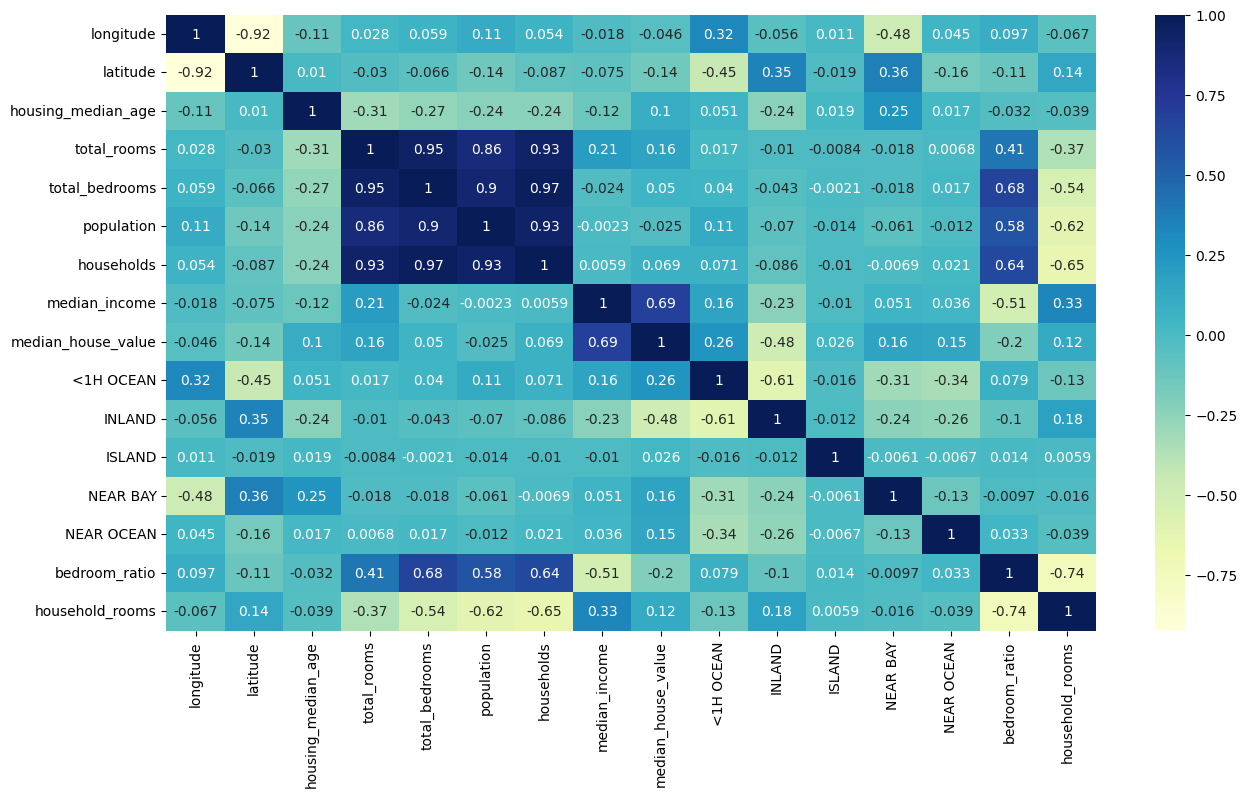

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, y_train =train_data.drop(['median_house_value'] , axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg= LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Using a placeholder for X_train_temp, y_train_temp

test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'] , axis=1) # Removed drop_first=True
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
X_test, y_test =test_data.drop(['median_house_value'] , axis=1), test_data['median_house_value']

In [ ]:
X_test, y_test =test_data.drop(['median_house_value'] , axis=1), test_data['median_house_value']

In [ ]:
X_test_s=scaler.transform(X_test)

In [ ]:
reg.score(X_test , y_test)

0.6698264386021967

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test , y_test)

0.9394233704663313

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators" : [30,50,100],
    "max_features" : [8,12,16],

}
grid_serach = GridSearchCV(forest , param_grid , cv=5,
                           scoring = "neg_mean_squared_error" ,
                           return_train_score =True)
grid_serach.fit(X_train_s , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 16],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')